# Importing Libraries

In [244]:
import numpy as np
import scipy as sp

# Visualization libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import collections
import queue
import scipy.io as spio

from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

In [26]:
# Loading dataset
df=pd.read_csv('cancer.csv', delimiter=',')

In [27]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
df.shape

(569, 33)

In [29]:
# Printing columns of dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [99]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2=df.copy()
df2=df2.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [100]:
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [101]:
# Create an array with above attributes 
df_array = np.array(df2)
df_array

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

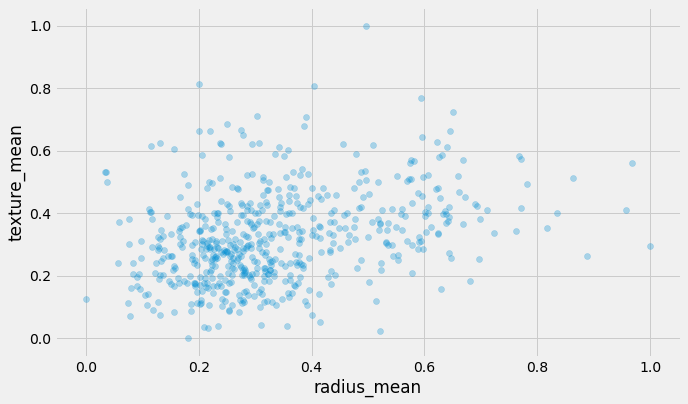

In [155]:
# Initial look at the distribution of radius_mean and texture_mean data
style.use('fivethirtyeight')

# plotting using radius_mean on X-axis and texture_mean on Y-axis
plt.figure(figsize = (10, 6))  
plt.scatter(df_array[:,0], df_array[:, 1], alpha=0.3)
plt.xlabel("radius_mean") 
plt.ylabel("texture_mean") 
plt.show()


# K-Means Clustering


In [108]:
def recalculate_clusters(X, centroids, k):
    " Recalculates the clusters "
    # Initiate empty clusters
    clusters = {}
    for i in range(k):
        clusters[i] = []
    # Setting the plot points using dataframe (X) and the vector norm (magnitude/length)
    for data in X:
        # Set up list of euclidian distance and iterate through
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters    


def recalculate_centroids(centroids, clusters, k):
    " Recalculates the centroid position based on the plot " 
    for i in range(k):
        # Finds the average of the cluster at given index
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids


def plot_clusters(centroids, clusters, k):
    "Plots the clusters with centroid and specified graph attributes"
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
    plt.figure(figsize = (10, 6))  
    plt.xlabel("radius_mean") 
    plt.ylabel("texture_mean") 
    area = (20) ** 2
    for i in range(k):
        print("No. of points in Cluster ", i+1, " is ", len(clusters[i]))
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)
    plt.show()

    
def k_means_clustering(X, centroids={}, k=2, repeats=10):
    "Calculates full k_means_clustering algorithm "
    for i in range(k):
        # Sets up the centroids based on the data
        centroids[i] = X[i]

    # Outputs the recalculated clusters and centroids 
    print(f'First and last of {repeats} iterations')
    for i in range(repeats):        
        clusters = recalculate_clusters(X, centroids, k)  
        centroids = recalculate_centroids(centroids, clusters, k)

        # Plot the first and last iteration of k_means given the repeats specified
        # Default is 10, so this would output the 1st iteration and the 10th
        if i == range(repeats)[-1] or i == range(repeats)[0]:
            print("Iteration No.= ", i+1)
            plot_clusters(centroids, clusters, k)

First and last of 10 iterations
Iteration No.=  1
No. of points in Cluster  1  is  45
No. of points in Cluster  2  is  524


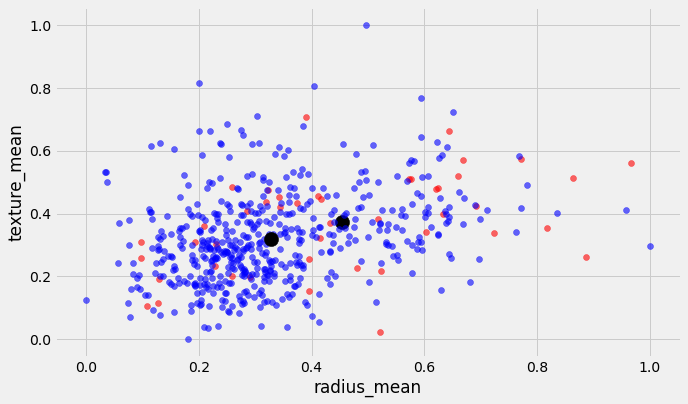

Iteration No.=  10
No. of points in Cluster  1  is  189
No. of points in Cluster  2  is  380


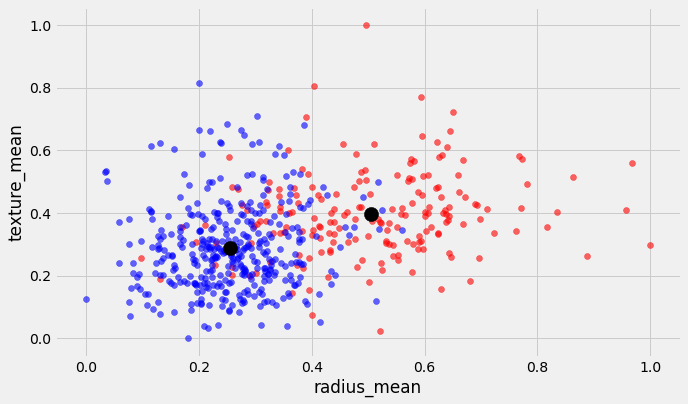

In [110]:
k_means_clustering(df_array)

# K-mediods Clustering

In [122]:
datapoints = df2.values
m, f = datapoints.shape

In [123]:
# Medoid Initialization

def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 2)

In [124]:
# Computing the Euclidean distances from mediods

def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S
  
S = compute_d_p(datapoints, medoids_initial, 2)


In [125]:
# Assigning labels
def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)

In [126]:
# Updating Mediods
def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids


In [127]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [137]:
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 2, 2)
final_medoids = results[0]
df['clusters'] = results[1]
df2['clusters'] = results[1]

In [138]:
k_mediods_clusters={}

for i in range(k):
    k_mediods_clusters[i]=[]
    
for i in range(df.shape[0]):
    k_mediods_clusters[df['clusters'][i]].append(df_array[i])

No. of points in Cluster  1  is  329
No. of points in Cluster  2  is  240


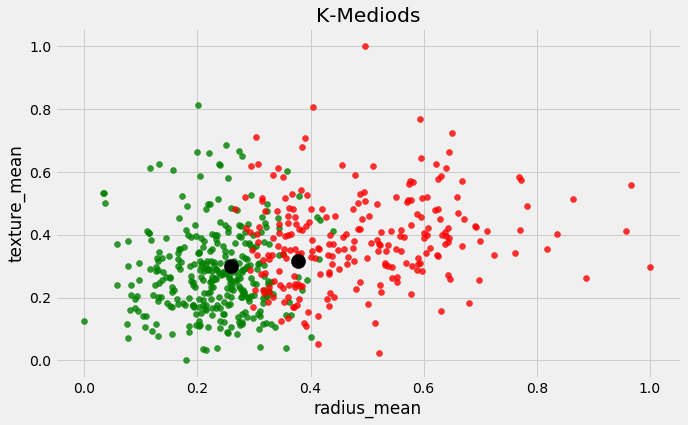

In [240]:
# Plotting after convergence of K-Mediods
colors=['green', 'red']
plt.figure(figsize = (10, 6))  
plt.xlabel("radius_mean") 
plt.ylabel("texture_mean") 
area = (20) ** 2

for i in range(k):
    print("No. of points in Cluster ", i+1, " is ", len(k_mediods_clusters[i]))
    for cluster in k_mediods_clusters[i]:
        plt.scatter(cluster[0], cluster[1], c=colors[i%k], alpha=0.8)          
    plt.scatter(final_medoids[i][0], final_medoids[i][1], c='black', s=200) 
plt.title('K-Mediods')
plt.show()